<a href="https://colab.research.google.com/github/VladislavTokarev02/AI_ML_homework/blob/main/Hometasks/Base/AI_HW2_GD_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [1]:
!pip install sympy

In [2]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def f(x):
  return x**2 - 30*x + 1
def g(x):
  return -x**3 - 7*x**2 + 5*x +17
def h(x):
  return x**2 - 1/x
def j(x):
  return 1/x**5 + x**17 + 8

In [4]:
x = sp.Symbol('x', real = True) #только на вещественных

In [5]:
def calc_extr(func):
    dfunc = sp.diff(func)
    solver = sp.solve(dfunc, x)
    d2func = sp.diff(dfunc)
    min_func = None
    max_func = None
    min_func_val = None
    max_func_val = None
    dct = {}
    for i in solver:
        d2func_val = d2func.subs(x, i)
        if d2func_val > 0:
            min_func = i
            min_func_val = func.subs(x, i)
            dct[min_func] = min_func_val
            print(f"минимум функции {min_func_val} достигается в точке {min_func}")
        elif d2func_val < 0:
            max_func = i
            max_func_val = func.subs(x, i)
            dct[max_func] = max_func_val
            print(f"максимум функции {max_func_val} достигается в точке {max_func}")
        else:
            print(f"В точке x = {i} ни максимум, ни минимум")

    return dct

In [6]:
f_x = calc_extr(f(x))
g_x = calc_extr(g(x))
h_x = calc_extr(h(x))
j_x = calc_extr(j(x))

минимум функции -224 достигается в точке 15
минимум функции -58 достигается в точке -5
максимум функции 482/27 достигается в точке 1/3
минимум функции 3*2**(1/3)/2 достигается в точке -2**(2/3)/2
максимум функции -22*17**(5/22)*5**(17/22)/85 + 8 достигается в точке -17**(21/22)*5**(1/22)/17
минимум функции 22*17**(5/22)*5**(17/22)/85 + 8 достигается в точке 17**(21/22)*5**(1/22)/17


## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [7]:
def calc_infl(func):
  dfunc = sp.diff(func)
  d2func = sp.diff(dfunc)
  solver = sp.solve(d2func)
  infl_dct = {}
  for i in solver:
    d2func_solv = i
    func_val = func.subs(x, i)
    infl_dct[d2func_solv] = func_val
    print(f"перегиб функции {func_val} достигается в точке {d2func_solv}")
  return infl_dct

In [8]:
f_x_infl = calc_infl(f(x))
g_x_infl = calc_infl(g(x))
h_x_infl = calc_infl(h(x))
j_x_infl = calc_infl(j(x))

перегиб функции -542/27 достигается в точке -7/3
перегиб функции 0 достигается в точке 1
перегиб функции 8 + (-543361077710752838169347099197440**(1/22)*sin(pi/22)*sin(pi/11)/34 + 543361077710752838169347099197440**(1/22)*cos(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/11)*cos(pi/22)/34)**(-5) + (-543361077710752838169347099197440**(1/22)*sin(pi/22)*sin(pi/11)/34 + 543361077710752838169347099197440**(1/22)*cos(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/11)*cos(pi/22)/34)**17 достигается в точке -543361077710752838169347099197440**(1/22)*sin(pi/22)*sin(pi/11)/34 + 543361077710752838169347099197440**(1/22)*cos(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/11)*cos(pi/22)/34
перегиб функции 8 

На самом деле, в коде не доказано, что именно эти точки являются точками перегиба, поскольку важное условие - это смена знака значения функции при смещении вправо/влево на числовой прямой. В ручном подходе это отобразил

### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

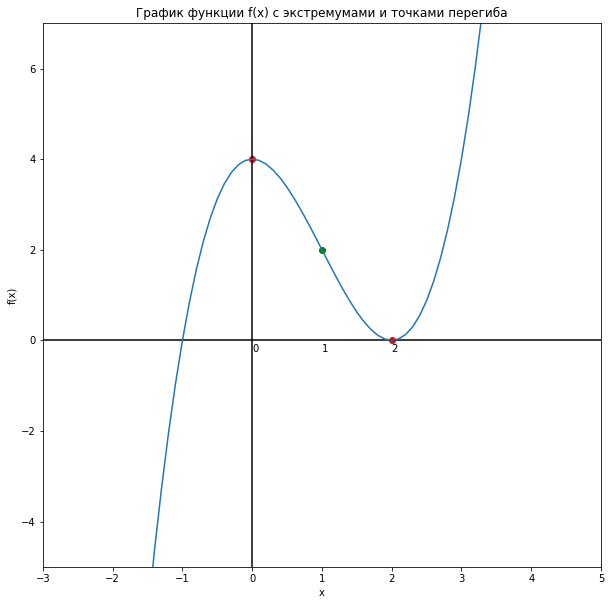

В данном случае показалось лучше изобразить координаты точки не на оси, а рядом с самой точкой.

точка минимума и ёё значение: 15, -224


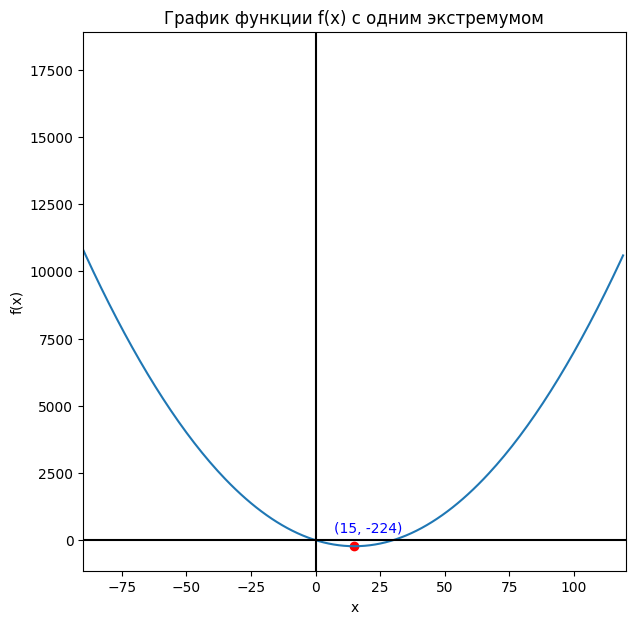

In [9]:
x_values = [x for x in np.arange(-120, 120, 1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize = (7, 7))
plt.plot(x_values, f_values)

plt.xlim([-90, 120])
#plt.ylim([-250, 100])
plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.title('График функции f(x) c одним экстремумом')

x_min = list(f_x.keys())[0]
y_min = list(f_x.values())[0]
print(f"точка минимума и ёё значение: {x_min}, {y_min}")

plt.scatter(x_min, y_min, color = 'red')

# Подписываем точку - помог gpt
plt.annotate(f"({x_min}, {y_min})",  # Текст подписи
             (x_min, y_min),         # Координаты самой точки
             textcoords="offset points", # Используем смещение
             xytext=(10, 10),            # Смещение подписи (x, y) в пикселях
             ha="center",                # Выравнивание по горизонтали
             color="blue")                # Цвет текста

plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

{-5: -58, 1/3: 482/27}
точка минимума и ёё значение: -5, -58
точка максимума и ёё значение: 1/3, 482/27
{-7/3: -542/27}
-7/3
-542/27


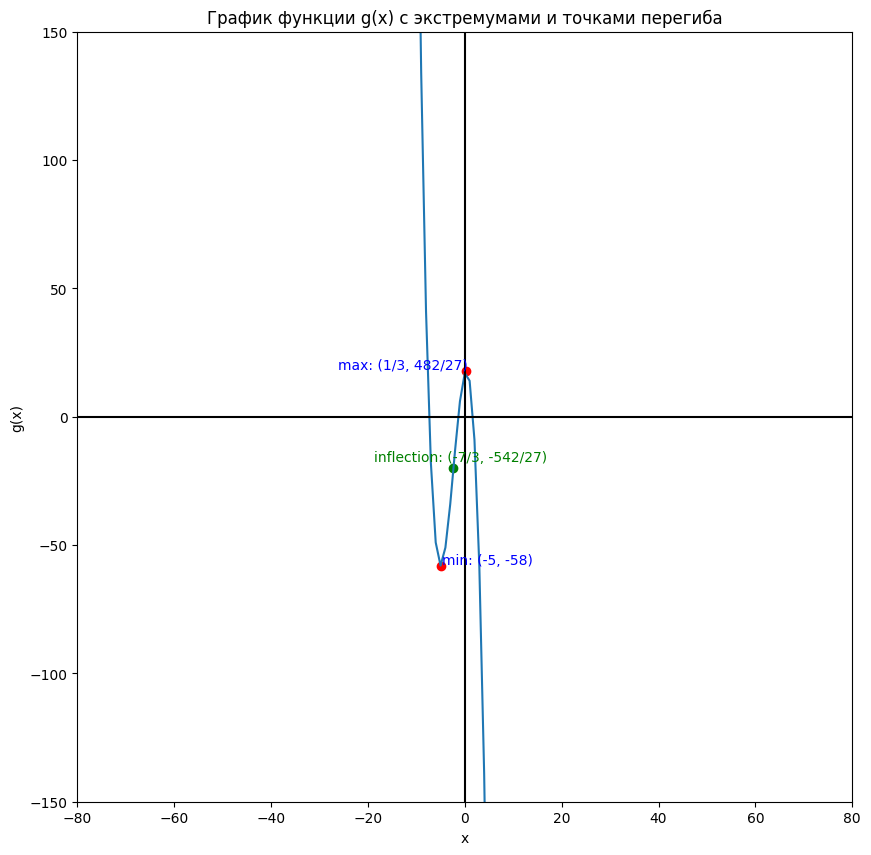

In [118]:
x_values = [x for x in np.arange(-120, 120, 1)]
g_values = [g(x) for x in x_values]

plt.figure(figsize = (10, 10))
plt.plot(x_values, g_values)

plt.xlim([-80, 80])
plt.ylim([-150, 150])
plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.title('График функции g(x) c экстремумами и точками перегиба')

print(g_x)
x_min = list(g_x.keys())[0]
y_min = list(g_x.values())[0]
x_max = list(g_x.keys())[1]
y_max = list(g_x.values())[1]
print(f"точка минимума и ёё значение: {x_min}, {y_min}")
print(f"точка максимума и ёё значение: {x_max}, {y_max}")

plt.scatter(x_min, y_min, color = 'red')
plt.scatter(x_max, y_max, color = 'red')


#для минимума
plt.annotate(f"min: ({x_min}, {y_min})",
             (x_min, y_min),
             textcoords="offset points",
             xytext=(1, 1),
             ha="left",
             color="blue")


#для максимума
plt.annotate(f"max: ({x_max}, {y_max})",
             (x_max, y_max),
             textcoords="offset points",
             xytext=(1, 1),
             ha="right",
             color="blue")



print(g_x_infl)
x_infl = list(g_x_infl.keys())[0]
y_infl = list(g_x_infl.values())[0]
print(x_infl)
print(y_infl)

plt.scatter(x_infl, y_infl, color = 'green')

#для точки перегиба
plt.annotate(f"inflection: ({x_infl}, {y_infl})",
             (x_infl, y_infl),
            textcoords="offset points",
             xytext=(5, 5),
             ha="center",
             color = 'green')


plt.xlabel('x')
plt.ylabel('g(x)')

plt.show()

{-2**(2/3)/2: 3*2**(1/3)/2}
точка минимума и ёё значение: -0.794, 1.890
{1: 0}
1
0


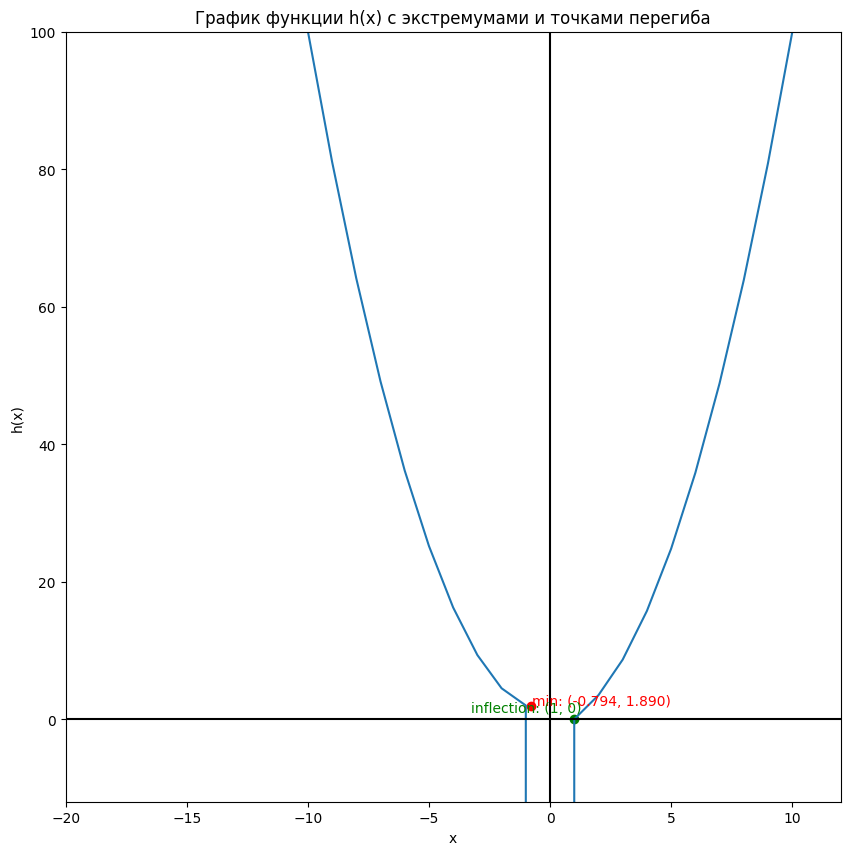

In [11]:
def h(x):
  return x**2 - 1/(x+1e-10) #искусcтвенно добавил для корректного отображения графика


x_values = [x for x in np.arange(-300, 300, 1)]
h_values = [h(x) for x in x_values]

plt.figure(figsize = (10, 10))
plt.plot(x_values, h_values)

plt.xlim([-20, 12])
plt.ylim([-12, 100])
plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.title('График функции h(x) c экстремумами и точками перегиба')

print(h_x)
x_min = round(list(h_x.keys())[0], 3)
y_min = round(list(h_x.values())[0], 3)
print(f"точка минимума и ёё значение: {x_min}, {y_min}")

plt.scatter(x_min, y_min, color = 'red')


#для минимума
plt.annotate(f"min: ({x_min}, {y_min})",  # Текст подписи
             (x_min, y_min),         # Координаты самой точки
             textcoords="offset points", # Используем смещение
             xytext=(1, 1),            # Смещение подписи (x, y)
             ha="left",                # Выравнивание по горизонтали
             color="red")



print(h_x_infl)
x_infl = round(list(h_x_infl.keys())[0])
y_infl = round(list(h_x_infl.values())[0])
print(x_infl)
print(y_infl)

plt.scatter(x_infl, y_infl, color = 'green')

#для точки перегиба
plt.annotate(f"inflection: ({x_infl}, {y_infl})",
             (x_infl, y_infl),
            textcoords="offset points",
             xytext=(5, 5),
             ha="right",
             color = 'green')


plt.xlabel('x')
plt.ylabel('h(x)')

plt.show()

точка минимума и ёё значение: 0.9458926861215569, 9.709087990271517
точка максимума и ёё значение: -0.9458926861215569, 6.290912009728484
{-0.9458926861215569: 6.290912009728484, 0.9458926861215569: 9.709087990271517}


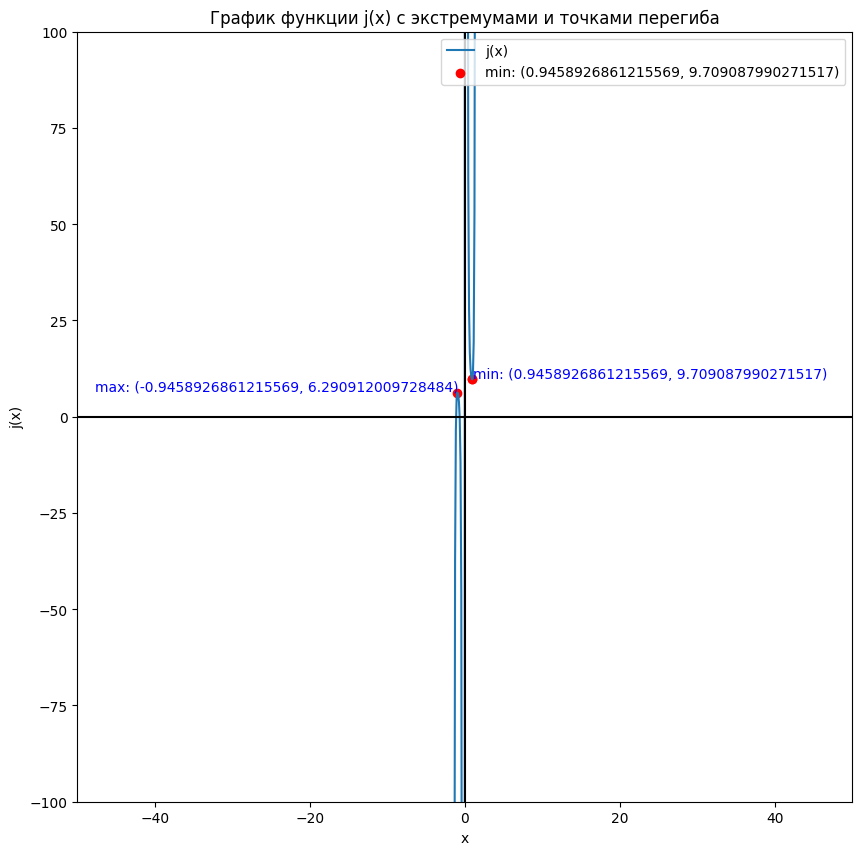

In [12]:
def j(x):
    return 1 / (x**5) + x**17 + 8

x_values = np.linspace(-50, 50, 1000)
j_values = [j(x) for x in x_values]


plt.figure(figsize=(10, 10))
plt.plot(x_values, j_values, label="j(x)")

plt.xlim([-50, 50])
plt.ylim([-1e2, 1e2])
plt.axvline(x=0, color='black', linestyle='solid')
plt.axhline(y=0, color='black', linestyle='solid')

plt.title('График функции j(x) с экстремумами и точками перегиба')

x = sp.Symbol('x', real=True)
j_sym = 1 / (x**5) + x**17 + 8


j_prime = sp.diff(j_sym, x)
j_double_prime = sp.diff(j_prime, x)

#помог gpt, т.к. была проблема с исключением мнимой части
critical_points = sp.solveset(j_prime, x, domain=sp.S.Reals)
critical_points = [float(sp.re(c.evalf())) for c in critical_points if c.is_real]


extrema = {c: j(c) for c in critical_points}
x_min = list(extrema.keys())[1]
y_min = list(extrema.values())[1]
x_max = list(extrema.keys())[0]
y_max = list(extrema.values())[0]
print(f"точка минимума и ёё значение: {x_min}, {y_min}")
print(f"точка максимума и ёё значение: {x_max}, {y_max}")

plt.scatter(x_min, y_min, color = 'red')
plt.scatter(x_max, y_max, color = 'red')


#для минимума
plt.annotate(f"min: ({x_min}, {y_min})",  # Текст подписи
             (x_min, y_min),         # Координаты самой точки
             textcoords="offset points", # Используем смещение
             xytext=(1, 1),            # Смещение подписи (x, y)
             ha="left",                # Выравнивание по горизонтали
             color="blue")


#для максимума
plt.annotate(f"max: ({x_max}, {y_max})",  # Текст подписи
             (x_max, y_max),         # Координаты самой точки
             textcoords="offset points", # Используем смещение
             xytext=(1, 1),            # Смещение подписи (x, y)
             ha="right",                # Выравнивание по горизонтали
             color="blue")







#точки перегиьа
inflection_points = sp.solveset(j_double_prime, x, domain=sp.S.Reals)
inflection_points = [float(sp.re(i.evalf())) for i in inflection_points if i.is_real]

inflection_values = {i: j(i) for i in inflection_points}

print(extrema)

plt.scatter(x_min, y_min, color='red', label=f"min: ({x_min}, {y_min})")



for x_infl, y_infl in inflection_values.items():
    plt.scatter(x_infl, y_infl, color='green', label=f"inflection: ({x_infl}, {y_infl:.2f})")
    plt.annotate(f"inflection: ({x_infl:.2f}, {y_infl:.2f})",
                 (x_infl, y_infl),
                 textcoords="offset points",
                 xytext=(5, 5),
                 ha="center",
                 color="green")


plt.xlabel('x')
plt.ylabel('j(x)')
plt.legend(loc="best")
plt.show()

График получился некрасивым, но сложно передать масштаб в данном случае.

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [13]:
def gradient_descent(func, x_start, learning_rate, epsilon, num_iterations, delta):
    x_curr = x_start
    df_x = sp.diff(func)

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
      x_new = x_curr - learning_rate * df_x.subs(x, x_curr)
      trace.append(x_new)

      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace
      if abs(df_x.subs(x, x_new)) < delta:
        return x_curr, trace

      x_curr = x_new

    return x_curr, trace

In [14]:
grad_fx = gradient_descent(f(x), 100, 0.01, 0.001, 1000, 1e-2)

In [15]:
grad_fx[0]

15.0491859264743

In [16]:
grad_gx  = gradient_descent(g(x), 0, 0.1, 0.01, 5000, 1e-6)

In [17]:
grad_gx[0]

-5.00450353421042

In [18]:
grad_hx = gradient_descent(h(x), 0, 0.1, 0.01, 6000, 1e-8)

In [19]:
grad_hx[0]

-0.801647334237612

In [20]:
grad_jx = gradient_descent(j(x), 10, 0.001, 0.01, 10000, 1e-6)

## На самом деле, градиентный спуск и его различные модификации не подходят для функций h(x) и j(x), так как они не являются гладкими, т.е. они не являются непрерывными на всей числовой области (x в знаменателе не может быть равен нулю)

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [88]:
func_fx = x**2 - 30*x + 1
func_gx = -x**3 - 7*x**2 + 5*x + 17
func_hx = x**2 - 1/x
func_jx = 1 / (x**5) + x**17 + 8

In [94]:
def gradient_descent(func, x_start, learning_rate, epsilon, num_iterations, delta):
    x = sp.Symbol('x')
    df_x = sp.diff(func, x)

    x_curr = sp.N(x_start)
    trace = [x_curr]

    for _ in range(num_iterations):
        #проверка выхода за пределы, помог gpt, поскольку не удаётся масштабировать код при больших значениях
        if abs(x_curr) > 1e6:
            print(f"Прервано для x_start={x_start}: значение {x_curr} выходит за допустимый диапазон")
            return x_curr, float('inf'), trace

        grad_value = sp.N(df_x.subs(x, x_curr))
        x_new = x_curr - learning_rate * grad_value
        trace.append(x_new)

        # Проверка критериев остановки
        if abs(x_new - x_curr) < epsilon:
            break
        if abs(grad_value) < delta:
            break

        x_curr = x_new

    y_min = sp.N(func.subs(x, x_curr))
    return float(x_curr), float(y_min), [float(x) for x in trace]

In [95]:
def plot_function_with_minimum(func, trace, minimum_x, minimum_y):
    x = sp.Symbol('x')
    func_lambdified = sp.lambdify(x, func, modules=['numpy'])

    x_vals = np.linspace(min(trace) - 2, max(trace) + 2, 500)
    y_vals = func_lambdified(x_vals)

    plt.plot(x_vals, y_vals, label="f(x)")
    plt.scatter(minimum_x, minimum_y, color='red', label=f"Minimum: ({minimum_x:.4f}, {minimum_y:.4f})")
    plt.xlabel("x")
    plt.ylabel("func")
    plt.legend(loc="best")
    plt.grid()
    plt.title("График функции с минимумом")
    plt.show()

Для функции f(x)

Лучшее начальное приближение: x0 = -4
Использованная learning_rate: 0.01
Найденный минимум: x = 14.5095, func(x) = -223.7594


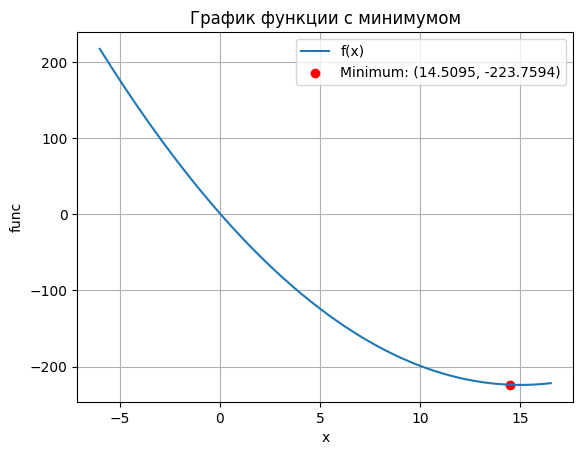

In [96]:
func = func_fx
learning_rate = 0.01
epsilon = 0.01
num_iterations = 10000
delta = 1e-3

# Список стартовых точек
initial_points = [-4, 0, 2, 3, 6, 120, 20]

# Поиск минимального значения
best_x = None
best_y = float('inf')
best_trace = None
best_start = None

for x_start in initial_points:
    x_min, y_min, trace = gradient_descent(func, x_start, learning_rate, epsilon, num_iterations, delta)
    if y_min < best_y:
        best_x, best_y = x_min, y_min
        best_trace = trace
        best_start = x_start

# Вывод результатов
print(f"Лучшее начальное приближение: x0 = {best_start}")
print(f"Использованная learning_rate: {learning_rate}")
print(f"Найденный минимум: x = {best_x:.4f}, func(x) = {best_y:.4f}")

# Построение графика
plot_function_with_minimum(func, best_trace, best_x, best_y)

Для функции g(x)

Прервано для x_start=12: значение 62178009.4027320 выходит за допустимый диапазон
Прервано для x_start=2: значение 158869990.755611 выходит за допустимый диапазон
Прервано для x_start=3: значение 18305391837.9857 выходит за допустимый диапазон
Прервано для x_start=6: значение 3974214.38001223 выходит за допустимый диапазон
Прервано для x_start=50: значение 6187539.69284452 выходит за допустимый диапазон
Лучший x0 = 0
learning_rate: 0.01
минимум при : x = -4.9395 получился g(x) = -57.9710


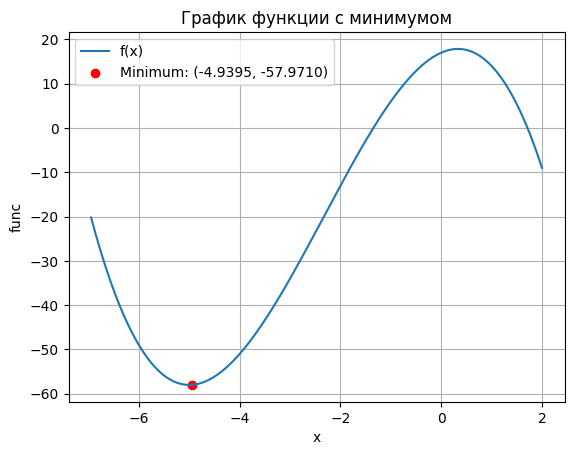

In [97]:
func = func_gx
learning_rate = 0.01
epsilon = 0.01
num_iterations = 1000
delta = 1e-3

#cписок x0
initial_points = [12, 0, 2, 3, 6, 50]


best_x = None
best_y = float('inf')
best_trace = None
best_start = None

for x_start in initial_points:
    x_min, y_min, trace = gradient_descent(func, x_start, learning_rate, epsilon, num_iterations, delta)
    if y_min < best_y:
        best_x, best_y = x_min, y_min
        best_trace = trace
        best_start = x_start


print(f"Лучший x0 = {best_start}")
print(f"learning_rate: {learning_rate}")
print(f"минимум при : x = {best_x:.4f} получился g(x) = {best_y:.4f}")


plot_function_with_minimum(func, best_trace, best_x, best_y)

Для функции h(x) не удалось найти локальный минимум, вероятно, из-за того, что функция h(x) имеет разрывы - это является критическим моментом для применимости метода градиентного спуска.

Для функции j(x) не удалось найти локальный минимум, вероятно, из-за того, что функция j(x) имеет разрывы - это является критическим моментом для применимости метода градиентного спуска.

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

Алгоритм действий от gpt

1. Инициализация: Задаем начальную точку x_0, точность tol и максимальное количество итераций max_iter.

2. Итерационный процесс: Для текущей точки x_k:
   - Вычисляем первую производную f'(x_k) и вторую производную f''(x_k).
   - Проверяем, что f''(x_k) не равен нулю (иначе деление будет невозможным).
   - Обновляем точку: x_{k+1} = x_k - f'(x_k)/f''(x_k).

3. Критерий остановки: Если разница между новой точкой x_{k+1} и текущей точкой x_k меньше заданной точности (то есть |x{k+1} − xk| < tol), прерываем алгоритм.

4. Результат: Минимум достигается в точке x_{min} = x_{k+1} после завершения итераций.


In [109]:
def newton(f, x0, epsilon, max_iter):
    df = sp.diff(f, x)
    d2f = sp.diff(df, x)
    x_curr = x0
    if d2f == 0:
        print("Вторая производная равна 0. Невозможно применить данный метод.")
        return None

    for _ in range(max_iter):
        df_value = df.subs(x, x_curr)
        d2f_value = d2f.subs(x, x_curr)

    x_new = x_curr - df_value / d2f_value

    if abs(x_new - x_curr) < epsilon:
        return x_new

    x_curr = x_new
    x_curr = round(x_curr, 3)
    print(f"По методу Ньютона точка минимума равна: {x_curr}")
    return x_curr

In [110]:
fx_newton = newton(func_fx, 45, 1e-3, 1000)

По методу Ньютона точка минимума равна: 15


In [129]:
gx_newton = newton(func_gx, -7, 1e-6, 100000)

По методу Ньютона точка минимума равна: -5.429


## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

In [ ]:
# your code here

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [ ]:
# your code here

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [ ]:
# your code here

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [ ]:
# your code here

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)